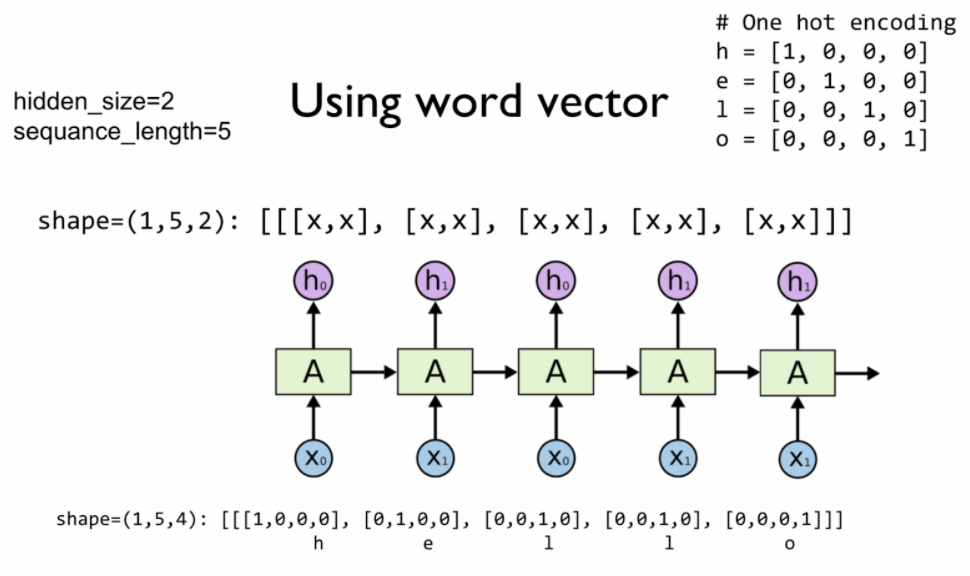

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model

tf.random.set_seed(42)

In [2]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

In [3]:
x_data = np.array([[h]], dtype=np.float32)
x_data

array([[[1., 0., 0., 0.]]], dtype=float32)

In [4]:
x_data.shape

(1, 1, 4)

In [5]:
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)
print(x_data.shape)
x_data

(1, 5, 4)


array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]], dtype=float32)

In [6]:
hidden_size = 2
cell = layers.SimpleRNNCell(hidden_size)
rnn = layers.RNN(cell, return_sequences=True, return_state=True)
outputs, state = rnn(x_data)

print('x_data : {} \t\t\tshape : {}'.format(x_data, x_data.shape))
print('outputs : {} \t\t\tshape : {}'.format(outputs, outputs.shape))
print('state : {} \t\t\tshape : {}'.format(state, state.shape))

x_data : [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]] 			shape : (1, 5, 4)
outputs : [[[ 0.31773362 -0.11744198]
  [-0.32728755 -0.3856686 ]
  [-0.88101393  0.5405645 ]
  [-0.5346198   0.8732985 ]
  [ 0.83859164  0.89698803]]] 			shape : (1, 5, 2)
state : [[0.83859164 0.89698803]] 			shape : (1, 2)


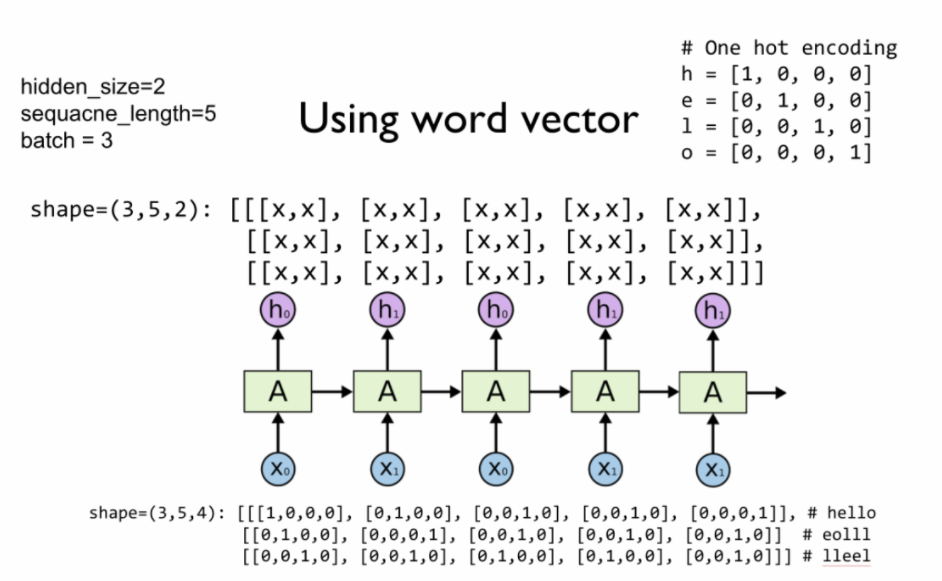

In [7]:
x_data = np.array([[h, e, l, l, o], [e, o, l, l, l], [l, l, e, e, l]],dtype=np.float32)
x_data

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]], dtype=float32)

In [9]:
hidden_size = 2
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)
outputs, state = rnn(x_data)

print('x_data : {} \t\t\tshape : {}'.format(x_data, x_data.shape))
print('outputs : {} \t\t\tshape : {}'.format(outputs, outputs.shape))
print('state : {} \t\t\tshape : {}'.format(state, state.shape))


x_data : [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]] 			shape : (3, 5, 4)
outputs : [[[ 0.54152584 -0.00444528]
  [-0.24527906  0.8775963 ]
  [ 0.81667423 -0.71729445]
  [-0.39880705  0.19528541]
  [ 0.43131363 -0.69072646]]

 [[-0.25328436  0.6770975 ]
  [ 0.73827237 -0.614059  ]
  [-0.31032306  0.11644197]
  [ 0.3663965  -0.7392534 ]
  [-0.42597967 -0.2466059 ]]

 [[ 0.26853478 -0.56203717]
  [-0.27304867 -0.3398094 ]
  [-0.54072225  0.50716776]
  [ 0.23090217  0.26456586]
  [ 0.4969957  -0.38958573]]] 			shape : (3, 5, 2)
state : [[ 0.43131363 -0.69072646]
 [-0.42597967 -0.2466059 ]
 [ 0.4969957  -0.38958573]] 			shape : (3, 2)


In [2]:
idx2char = ['토', '마', '를', '먹', '자']

x_data = [[0, 0, 1, 2, 4, 3]] #토 토 마 를 자 먹
y_data = [[0, 1, 0, 2, 3, 4]] #토 마 토 를 먹 자

num_class = 5 # 클래스 갯수 - '토,마,를,먹,자'
input_dim = 5 #word embedding dimension
sequence_length = 6
learning_rate = 0.1

x_one_hot = tf.keras.utils.to_categorical(x_data, num_classes=num_class)
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_class)


x_one_hot, y_one_hot

(array([[[1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1.],
         [0., 0., 0., 1., 0.]]], dtype=float32), array([[[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]], dtype=float32))

In [3]:
x_one_hot.shape, y_one_hot.shape

((1, 6, 5), (1, 6, 5))

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential, Model

model = tf.keras.Sequential()
cell = layers.SimpleRNNCell(units=5, input_shape=(sequence_length, input_dim))
model.add(layers.RNN(cell=cell, return_sequences=True, return_state=False,  input_shape=(sequence_length, input_dim)))
model.add(layers.TimeDistributed(layers.Dense(units=num_class, activation='softmax')))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn (RNN)                   (None, 6, 5)              55        
                                                                 
 time_distributed (TimeDistr  (None, 6, 5)             30        
 ibuted)                                                         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(x_one_hot, y_one_hot, epochs=10)


Epoch 1/10
1/1 [==============================] - 0s 13ms/step - loss: 0.9993 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 0.8704 - accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 0.7408 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6129 - accuracy: 0.8333
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 0.4986 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 0.4077 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.3363 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2754 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2224 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.1798 - accuracy: 1.0000


In [5]:
pred = model.predict(x_one_hot)
pred

array([[[0.33904222, 0.1729021 , 0.18610927, 0.150493  , 0.15145344],
        [0.32652166, 0.23141885, 0.20061097, 0.09999379, 0.14145476],
        [0.43268725, 0.09303298, 0.12460576, 0.07041836, 0.27925563],
        [0.2578331 , 0.34140918, 0.26884213, 0.03318195, 0.09873369],
        [0.06707714, 0.01573526, 0.03734869, 0.83724475, 0.04259417],
        [0.4389921 , 0.06795739, 0.12549777, 0.04182547, 0.32572725]]],
      dtype=float32)

In [7]:
pred.shape

(1, 6, 5)

In [6]:
for i, word in enumerate(pred):
    print(" ".join([idx2char[c] for c in np.argmax(word, axis=1)]))

토 토 토 마 먹 토


In [8]:
x_data = [[0, 0, 0, 1, 3, 0]] #토 토 토 마 먹 토
x_one_hot = tf.keras.utils.to_categorical(x_data, num_classes=num_class)

In [9]:
pred = model.predict(x_one_hot)
for i, word in enumerate(pred):
    print(" ".join([idx2char[c] for c in np.argmax(word, axis=1)]))

토 마 토 토 토 마


In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ['i love my dog', 'I, love my cat', 'You love my dog!']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['i love my dog',
             'I, love my cat',
             'You love my dog',
             'Do you think my dog is amazing?']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

{'my': 1, 'love': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6, 'do': 7, 'think': 8, 'is': 9, 'amazing': 10}
[[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]


In [4]:

padded = pad_sequences(sequences, maxlen=5, padding='post', truncating='post')
print(padded)

[[4 2 1 3 0]
 [4 2 1 6 0]
 [5 2 1 3 0]
 [7 5 8 1 3]]


In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['i love my dog',
             'I, love my cat',
             'You love my dog',
             'Do you think my dog is amazing?']

tokenizer = Tokenizer(oov_token="<oov>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)
padded = pad_sequences(sequences, maxlen=5, padding='post', truncating='post')
print(padded)

{'<oov>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]


In [7]:
test_data = ['i really love my dog', 'my dog loves my manatee']
test_seq = tokenizer.texts_to_sequences(test_data)
padded = pad_sequences(test_seq, maxlen=5, padding='post', truncating='post')
print(padded)

[[5 1 3 2 4]
 [2 4 1 2 1]]


In [9]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

tf.random.set_seed(42)

In [11]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTK8H26/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTK8H26/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteTK8H26/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [12]:
train_data, test_data = imdb['train'], imdb['test']

In [15]:
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

for s, l in train_data:
    train_sentences.append(s.numpy().decode('utf-8'))
    train_labels.append(l.numpy())

for s, l in test_data:
    test_sentences.append(s.numpy().decode('utf-8'))
    test_labels.append(l.numpy())

In [16]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [17]:
len(train_sentences), len(train_sentences[0])

(25000, 709)

In [20]:
len(train_sentences[0].split())

116

In [19]:
len(test_sentences), test_sentences[0]

(25000,
 "There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.")

In [22]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<oov>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

In [24]:
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

In [25]:
index_word ={value : key for (key, value) in word_index.items()}
index_word[1]

'<oov>'

In [26]:
index_word[0]

KeyError: ignored

In [27]:
padded[0]

array([   0,    0,    0,   12,   14,   33,  425,  392,   18,   90,   28,
          1,    9,   32, 1366, 3585,   40,  486,    1,  197,   24,   85,
        154,   19,   12,  213,  329,   28,   66,  247,  215,    9,  477,
         58,   66,   85,  114,   98,   22, 5675,   12, 1322,  643,  767,
         12,   18,    7,   33,  400, 8170,  176, 2455,  416,    2,   89,
       1231,  137,   69,  146,   52,    2,    1, 7577,   69,  229,   66,
       2933,   16,    1, 2904,    1,    1, 1479, 4940,    3,   39, 3900,
        117, 1584,   17, 3585,   14,  162,   19,    4, 1231,  917, 7917,
          9,    4,   18,   13,   14, 4139,    5,   99,  145, 1214,   11,
        242,  683,   13,   48,   24,  100,   38,   12, 7181, 5515,   38,
       1366,    1,   50,  401,   11,   98, 1197,  867,  141,   10],
      dtype=int32)

In [49]:
def decode_review(text):
    return " ".join([index_word.get(i, '?') for i in text])

In [50]:
decode_review(padded[0])

"? ? ? this was an absolutely terrible movie don't be <oov> in by christopher walken or michael <oov> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <oov> rebels were making their cases for <oov> maria <oov> <oov> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <oov> good name i could barely sit through it"

In [30]:
train_sentences[0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

In [32]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [38]:
test_sentences[0]

"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come."

In [35]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padd = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)

In [39]:
test_padd[0]

array([  48,   24,  106,   13,   95, 4066,   16,  740, 5065,   10,   14,
        312,    5,    2,  579,  349,   16, 1847, 1257,    1,   16,  668,
       7666, 5531,    1,  761,    6,   13, 1026,    1,    1,  425,  478,
          1,    4,    1,  327, 3560,   20,  229,    3,   15, 5742,    3,
         15, 1620,   15,   99,    5,    2, 3550,  100,   11,  772, 1498,
         12,  252,  235,   11,  217,    2,  366, 6454,    3,   58,   93,
         11,   90,  102,   11, 1498,  177,   12,  252,   36,    6, 1126,
          1,  674,    7, 4387,    1,    4,    1,  327,    7,   36, 8300,
        366,    5, 1403,    1,   13,   29,   60,   26,    6,  867,  178,
         17,    4, 1037,    5,   12,  227,    3,   79,    4,  345,   32,
        345, 5159,    5,   10,    6, 1314, 1143,    2, 5619,    1],
      dtype=int32)

In [40]:
decode_review(test_padd[0])

"there are films that make careers for george romero it was night of the living dead for kevin smith <oov> for robert rodriguez el <oov> add to that list <oov> <oov> absolutely amazing <oov> a <oov> less flawless film making and as assured and as professional as any of the aforementioned movies i haven't laughed this hard since i saw the full monty and even then i don't think i laughed quite this hard so to speak <oov> talent is considerable <oov> a <oov> less is so chock full of double <oov> that one would have to sit down with a copy of this script and do a line by line examination of it to fully appreciate the uh <oov>"

In [37]:
num_epochs = 10
hist = model.fit(padded, train_labels, validation_data=(test_padd, test_labels), epochs=num_epochs)


Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3372 - accuracy: 0.8593 - val_loss: 0.3732 - val_accuracy: 0.8321
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2740 - accuracy: 0.8875 - val_loss: 0.3672 - val_accuracy: 0.8380
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2374 - accuracy: 0.9063 - val_loss: 0.3851 - val_accuracy: 0.8332
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2118 - accuracy: 0.9190 - val_loss: 0.4049 - val_accuracy: 0.8300
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1895 - accuracy: 0.9311 - val_loss: 0.4350 - val_accuracy: 0.8253
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1721 - accuracy: 0.9375 - val_loss: 0.4873 - val_accuracy: 0.8131
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1565 - accuracy: 0.9444 - val_loss: 0.5039 - val_accuracy: 0.8167
Epoch 

In [42]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
weights.shape

(10000, 16)

In [44]:
index_word[2]

'the'

In [45]:
weights[2]

array([ 0.05889481,  0.09553708, -0.08917559,  0.01003763,  0.34391564,
       -0.03585958, -0.06229638, -0.01718009,  0.01363293, -0.02523435,
        0.0227582 ,  0.11880917,  0.11235803, -0.05043963,  0.5664341 ,
       -0.06823978], dtype=float32)

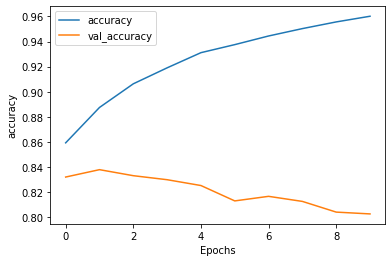

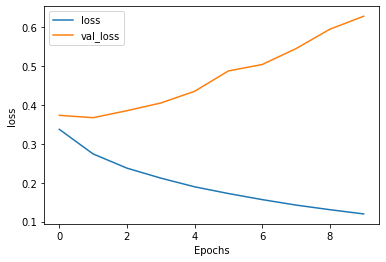

In [46]:
import matplotlib.pyplot as plt

def plot_graphs(hist, string):
    plt.plot(hist.history[string])
    plt.plot(hist.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(hist, 'accuracy')
plot_graphs(hist, 'loss')